# Washington State Salaries

an exploration of public data

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from scipy.stats import gaussian_kde

matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

ftype = '.pdf'

In [3]:
def getSalary(sal_str):
    return float(sal_str.replace(",", ""))

def flattenTitles(job_str):
    if job_str.startswith("RESEARCH CONSULTANT (NE S 6)"):
        return "RESEARCH CONSULTANT 6"
    if job_str.startswith("RESEARCH CONSULTANT (E S 7)"):
        return "RESEARCH CONSULTANT 7"
    if job_str.startswith("RESEARCH CONSULTANT (E S 8)"):
        return "RESEARCH CONSULTANT 8"
    if job_str.startswith("RESEARCH CONSULTANT (E S 9)"):
        return "RESEARCH CONSULTANT 9"
    if job_str.startswith("RESEARCH CONSULTANT (E S 10)"):
        return "RESEARCH CONSULTANT 10"
    if job_str.startswith("RESEARCH CONSULTANT (E S 11)"):
        return "RESEARCH CONSULTANT 11"
    
    if job_str.startswith("RESEARCH COORDINATOR (NE S 6)") or job_str.startswith("RESEARCH COORDINATOR (E S 6)"):
        return "RESEARCH COORDINATOR 6"
    if job_str.startswith("RESEARCH COORDINATOR (NE S 7)") or job_str.startswith("RESEARCH COORDINATOR (E S 7)"):
        return "RESEARCH COORDINATOR 7"
    if job_str.startswith("RESEARCH COORDINATOR (E S 8)"):
        return "RESEARCH COORDINATOR 8"
    if job_str.startswith("RESEARCH COORDINATOR (E S 9)"):
        return "RESEARCH COORDINATOR 9"
    if job_str.startswith("RESEARCH COORDINATOR (E S 10)"):
        return "RESEARCH COORDINATOR 10"
    return job_str

In [4]:
data = 'AnnualEmployeeSalary.csv'

df = pd.read_csv(data, converters={'JobTitle': flattenTitles,
                                   'Sal2015': getSalary,
                                   'Sal2016': getSalary,
                                   'Sal2017': getSalary,
                                   'Sal2018': getSalary,
                                   'Sal2019': getSalary})
df.columns

Index(['Agy', 'AgyTitle', 'Name', 'JobTitle', 'Sal2015', 'Sal2016', 'Sal2017',
       'Sal2018', 'Sal2019'],
      dtype='object')

In [5]:
df["AgyTitle"].str.contains("University of Washington")

0         False
1          True
2          True
3         False
4         False
          ...  
474867    False
474868    False
474869    False
474870    False
474871    False
Name: AgyTitle, Length: 474872, dtype: bool

In [6]:
df["JobTitle"][df["AgyTitle"].str.contains("University of Washington") &
               df["JobTitle"].str.contains("RESEARCH CONSULTANT")].unique()

array(['RESEARCH CONSULTANT 9', 'RESEARCH CONSULTANT 10',
       'RESEARCH CONSULTANT 8', 'RESEARCH CONSULTANT 11',
       'RESEARCH CONSULTANT 7', 'RESEARCH CONSULTANT 6',
       'RESEARCH CONSULTANT                                                        '],
      dtype=object)

In [7]:
df[(df['JobTitle'].str.contains('RESEARCH CONSULTANT 11')) & (df['Sal2019'] > 0)]

,Agy,AgyTitle,Name,JobTitle,Sal2015,Sal2016,Sal2017,Sal2018,Sal2019
16303,360,University of Washington ...,"PIKE, KENNETH",RESEARCH CONSULTANT 11,0.0,0.0,0.0,86000.0,98500.0


## Part 1: Comparing MY job

How much do my peers make?

In [8]:
sum(df['JobTitle'].str.contains('RESEARCH SCIENTIST/ENGINEER 3'))

1234

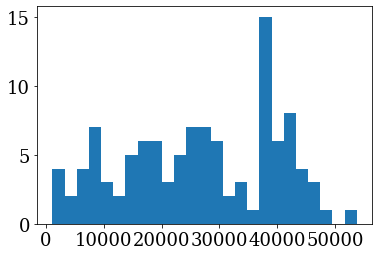

In [9]:
_ = plt.hist(df['Sal2019'][(df['JobTitle'].str.contains('RESEARCH SCIENTIST/ENGINEER - ASSISTANT')) & (df['Sal2019'] > 0)], 
             bins=25)

In [10]:
# limits of salary:
# https://hr.uw.edu/professional-staff-program/#appendix-professional-staff-salaries
# Research Scientist 3 = Grade 8

In [11]:
def kde_scipy(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scipy"""
    # Note that scipy weights its bandwidth by the covariance of the
    # input data.  To make the results comparable to the other methods,
    # we divide the bandwidth by the sample standard deviation here.
    kde = gaussian_kde(x, bw_method=bandwidth / x.std(ddof=1), **kwargs)
    return kde.evaluate(x_grid)


Text(0.5, 0, '2019 Salary ($k)')

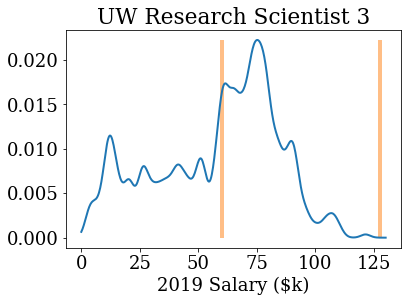

In [12]:
thisdata = df['Sal2019'][(df['JobTitle'].str.contains('RESEARCH SCIENTIST/ENGINEER 3')) & (df['Sal2019'] > 0)] / 1e3

kde = kde_scipy(thisdata, np.linspace(0,130,500), bandwidth=2)

plt.plot(np.linspace(0,130,500),kde, lw=2, label='2019 Data')
plt.vlines([60.216, 127.500], ymin=kde.min(), ymax=kde.max(), color='C1', lw=4, alpha=0.5, label='Grade Rage')

plt.title('UW Research Scientist 3')
plt.xlabel('2019 Salary ($k)')

In [13]:
# df[['Sal2017','Name']][(df['JobTitle'].str.contains('RESEARCH SCIENTIST/ENGINEER 3')) & (df['Sal2017'] > 0)]

Text(0.5, 0, '2019 Salary ($k)')

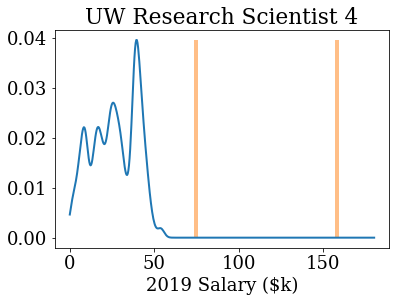

In [14]:
thisdata = df['Sal2019'][(df['JobTitle'].str.contains('RESEARCH SCIENTIST/ENGINEER - ASSISTANT')) & (df['Sal2019'] > 0)] / 1e3

kde = kde_scipy(thisdata, np.linspace(0,180,500), bandwidth=2)

plt.plot(np.linspace(0,180,500),kde, lw=2, label='2019 Data')
plt.vlines([74.616, 158.004], ymin=kde.min(), ymax=kde.max(), color='C1', lw=4, alpha=0.5, label='Grade Rage')

plt.title('UW Research Scientist 4')
plt.xlabel('2019 Salary ($k)')


12 53.599999999999994 66.744 -0.24522388059701505
158 55.9 77.886 -0.3933094812164579
94 61.05 93.114 -0.5252088452088454
22 72.85 107.73 -0.47879203843514084
5 87.6 144.366 -0.6480136986301372


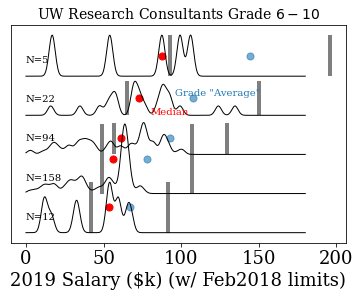

In [15]:
capsFeb2018 = [[41.904, 91.584],  # Grade 6
               [48.780, 106.992], # 7
               [56.664, 129.564], # 8
               [65.352, 150.108],
               [92.616, 196.116]] # 11
capsOct2019 = [[43.578, 95.247],
               [52.268, 111.278],
               [58.997, 134.748],
               [69.396, 150.248]]

titles = ['RESEARCH CONSULTANT 6',
          'RESEARCH CONSULTANT 7',
          'RESEARCH CONSULTANT 8',
          'RESEARCH CONSULTANT 9',
          'RESEARCH CONSULTANT 10']

yoff =0.038

glabels=['6', '7', '8', '9', '10']

for k in range(len(titles)):
    thisdata = df['Sal2019'][(df['JobTitle'].str.contains(titles[k])) & (df['Sal2019'] > 0)] / 1e3

    kde = kde_scipy(thisdata, np.linspace(0,180,500), bandwidth=2)

    plt.plot(np.linspace(0,180,500), kde + yoff*k, lw=1, c='k')
    
    plt.vlines(capsFeb2018[k], ymin=kde.min()+ yoff*k, ymax=kde.max() +yoff*k, 
               color='k', lw=4, alpha=0.5)

    plt.scatter(thisdata.median(), (kde.max()+kde.min())/2.+yoff*k, color='r',s=50)
    plt.scatter(np.mean(capsFeb2018[k]), (kde.max()+kde.min())/2.+yoff*k, color='C0',s=50, alpha=0.6)
    
    print(np.size(thisdata), thisdata.median(), np.mean(capsFeb2018[k]), 
          (thisdata.median() - np.mean(capsFeb2018[k]))/thisdata.median())
    
#     plt.text(170, yoff*k+ yoff/7, glabels[k], fontsize=12)
    plt.text(0, yoff*k+yoff/3, 'N='+str(np.size(thisdata)), fontsize=10)
    
plt.title('UW Research Consultants Grade $6-10$', fontsize=14)
plt.xlabel('2019 Salary ($k) (w/ Feb2018 limits)')

plt.text(80,yoff*3, 'Median', color='r', fontsize=10)
plt.text(96,yoff*3+yoff/2, 'Grade "Average"', color='C0', fontsize=10)
plt.gca().axes.get_yaxis().set_visible(False)

plt.savefig('salary.png',dpi=350, bbox_inches='tight', pad_inches=0.25)

131 28.1 66.744 -1.3752313167259784
281 48.4 77.886 -0.6092148760330578
176 63.949999999999996 93.114 -0.45604378420641145
58 78.95 107.73 -0.36453451551614946
10 89.19999999999999 144.366 -0.6184529147982066


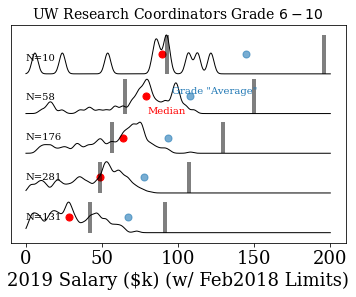

In [16]:
capsFeb2018 = [[41.904, 91.584],  # Grade 6
               [48.780, 106.992], # 7
               [56.664, 129.564], # 8
               [65.352, 150.108],
               [92.616, 196.116]] # 9
capsOct2019 = [[43.578, 95.247],
               [52.268, 111.278],
               [58.997, 134.748],
               [69.396, 150.248]]

titles = ['RESEARCH COORDINATOR 6',
          'RESEARCH COORDINATOR 7',
          'RESEARCH COORDINATOR 8',
          'RESEARCH COORDINATOR 9',
          'RESEARCH COORDINATOR 10']

yoff =0.038

glabels=['6', '7', '8', '9', '10']

for k in range(len(titles)):
    thisdata = df['Sal2019'][(df['JobTitle'].str.contains(titles[k])) & (df['Sal2019'] > 0)] / 1e3

    kde = kde_scipy(thisdata, np.linspace(0,200,500), bandwidth=2)

    plt.plot(np.linspace(0,200,500), kde + yoff*k, lw=1, c='k')
    
    plt.vlines(capsFeb2018[k], ymin=kde.min()+ yoff*k, ymax=kde.max() +yoff*k, 
               color='k', lw=4, alpha=0.5)

    plt.scatter(thisdata.median(), (kde.max()+kde.min())/2.+yoff*k, color='r',s=50)
    plt.scatter(np.mean(capsFeb2018[k]), (kde.max()+kde.min())/2.+yoff*k, color='C0',s=50, alpha=0.6)
    
    print(np.size(thisdata), thisdata.median(), np.mean(capsFeb2018[k]), 
          (thisdata.median() - np.mean(capsFeb2018[k]))/thisdata.median())
    
#     plt.text(170, yoff*k+ yoff/7, glabels[k], fontsize=12)
    plt.text(0, yoff*k+yoff/3, 'N='+str(np.size(thisdata)), fontsize=10)
    
plt.title('UW Research Coordinators Grade $6-10$', fontsize=14)
plt.xlabel('2019 Salary ($k) (w/ Feb2018 Limits)')

plt.text(80,yoff*3, 'Median', color='r', fontsize=10)
plt.text(96,yoff*3+yoff/2, 'Grade "Average"', color='C0', fontsize=10)
plt.gca().axes.get_yaxis().set_visible(False)

plt.savefig('salary.png',dpi=350, bbox_inches='tight', pad_inches=0.25)

RESEARCH SCIENTIST/ENGINEER - ASSISTANT
307
111 27.1 61.5945 -1.2728597785977858
RESEARCH SCIENTIST/ENGINEER 1
851
345 33.4 65.9585 -0.974805389221557
RESEARCH SCIENTIST/ENGINEER 2
1128
478 52.8 80.392 -0.5225757575757576
RESEARCH SCIENTIST/ENGINEER 3
1234
548 64.45 93.858 -0.45629169899146627
RESEARCH SCIENTIST/ENGINEER 4
829
368 81.7 116.31 -0.4236230110159119


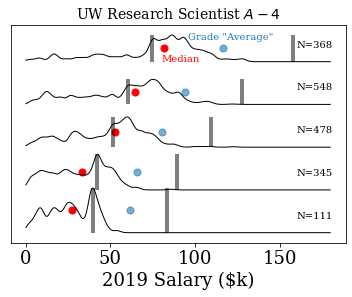

In [27]:
capsFeb2018 = [[37.992, 80.460],
               [40.680, 86.160],  # Grade 6
               [49.584, 105.012], # 7
               [57.900, 122.604], # 8
               [71.736, 151.920]] # 9
capsOct2019 = [[39.513, 83.676],
               [42.313, 89.604],
               [51.572, 109.212],
               [60.216, 127.500],
               [74.616, 158.004]]
limits = capsOct2019

titles = ['RESEARCH SCIENTIST/ENGINEER - ASSISTANT',
          'RESEARCH SCIENTIST/ENGINEER 1',
          'RESEARCH SCIENTIST/ENGINEER 2',
          'RESEARCH SCIENTIST/ENGINEER 3',
          'RESEARCH SCIENTIST/ENGINEER 4']

yoff =0.038

glabels=['A', '1','2','3','4']

for k in range(len(titles)):
    print(titles[k])
    print(df['JobTitle'].str.contains(titles[k]).sum())
    
    thisdata = df['Sal2019'][(df['JobTitle'].str.contains(titles[k]) & (df['Sal2019'] > 0 * 1e3))] / 1e3

    kde = kde_scipy(thisdata, np.linspace(0,180,500), bandwidth=2)

    plt.plot(np.linspace(0,180,500), kde + yoff*k, lw=1, c='k')
    
    plt.vlines(limits[k], ymin=kde.min()+ yoff*k, ymax=kde.max() +yoff*k, 
               color='k', lw=4, alpha=0.5)

    plt.scatter(thisdata.median(), (kde.max()+kde.min())/2.+yoff*k, color='r',s=50)
    plt.scatter(np.mean(limits[k]), (kde.max()+kde.min())/2.+yoff*k, color='C0',s=50, alpha=0.6)
    
    print(np.size(thisdata), thisdata.median(), np.mean(limits[k]), 
          (thisdata.median() - np.mean(limits[k]))/thisdata.median())
    
    # plt.text(170, yoff*k+ yoff/7, glabels[k], fontsize=12)
    plt.text(160, yoff*k+yoff/3, 'N='+str(np.size(thisdata)), fontsize=10)
    
plt.title('UW Research Scientist $A-4$', fontsize=14)
plt.xlabel('2019 Salary ($k)')

plt.text(80,yoff*4, 'Median', color='r', fontsize=10)
plt.text(96,yoff*4+yoff/2, 'Grade "Average"', color='C0', fontsize=10)
plt.gca().axes.get_yaxis().set_visible(False)

plt.savefig('salaryRSEA4.png', dpi=350, bbox_inches='tight', pad_inches=0.25)

368 81.7 116.31 -0.4236230110159119
192 99.55000000000001 65.9585 0.3374334505273732
91 127.7 80.392 0.3704620203602193
55 170.7 93.858 0.4501581722319859


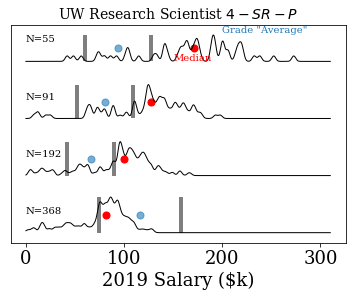

In [29]:
capsFeb2018 = [[71.736, 151.920],
               [92.616, 196.116],  # Grade 6
               [107.520, 246.672], # 7
               [132.372, 303.708]] # 9
capsOct2019 = [[74.616, 158.004],
               [42.313, 89.604],
               [51.572, 109.212],
               [60.216, 127.500],
               [74.616, 158.004]]

titles = ['RESEARCH SCIENTIST/ENGINEER 4',
          'RESEARCH SCIENTIST/ENGINEER-SENIOR',
          'RESEARCH SCIENTIST/ENGINEER PRINCIPAL',
          'RESEARCH SCIENTIST/ENGINEER-SR PRINCIPAL']

yoff =0.038

glabels=['4', 'SR','P','SR-P']

for k in range(len(titles)):
    thisdata = df['Sal2019'][(df['JobTitle'].str.contains(titles[k]) & (df['Sal2019'] > 0))] / 1e3

    kde = kde_scipy(thisdata, np.linspace(0,310,500), bandwidth=2)

    plt.plot(np.linspace(0,310,500), kde + yoff*k, lw=1, c='k')
    
    plt.vlines(capsOct2019[k], ymin=kde.min()+ yoff*k, ymax=kde.max() +yoff*k, 
               color='k', lw=4, alpha=0.5)

    plt.scatter(thisdata.median(), (kde.max()+kde.min())/2.+yoff*k, color='r',s=50)
    plt.scatter(np.mean(capsOct2019[k]), (kde.max()+kde.min())/2.+yoff*k, color='C0',s=50, alpha=0.6)
    
    print(np.size(thisdata), thisdata.median(), np.mean(capsOct2019[k]), 
          (thisdata.median() - np.mean(capsOct2019[k]))/thisdata.median())
    
#     plt.text(170, yoff*k+ yoff/7, glabels[k], fontsize=12)
    plt.text(0, yoff*k+yoff/3, 'N='+str(np.size(thisdata)), fontsize=10)
    
plt.title('UW Research Scientist $4 - SR-P$', fontsize=14)
plt.xlabel('2019 Salary ($k)')

plt.text(150, yoff*3, 'Median', color='r', fontsize=10)
plt.text(200, yoff*3+yoff/2, 'Grade "Average"', color='C0', fontsize=10)
plt.gca().axes.get_yaxis().set_visible(False)

plt.savefig('salary.png',dpi=350, bbox_inches='tight', pad_inches=0.25)

(20, 300)

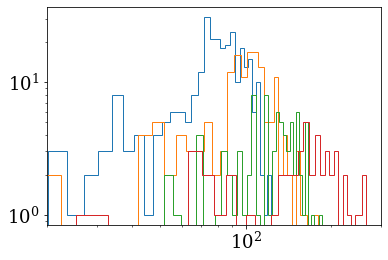

In [19]:

for k in range(len(titles)):
    thisdata = df['Sal2017'][(df['JobTitle'].str.contains(titles[k])) & (df['Sal2017'] > 0)] / 1e3

#     kde = kde_scipy(thisdata, np.linspace(0,180,500), bandwidth=2)
    _ =plt.hist(thisdata,bins=35, histtype='step')
#     plt.plot(np.linspace(0,180,500), kde, lw=1, c='k')
    
#     plt.vlines(caps[k], ymin=kde.min(), ymax=kde.max(), 
#                color='k', lw=4, alpha=0.5)

plt.xscale('log')    
plt.yscale('log')    
plt.xlim(20,300)
    

### One more thing...

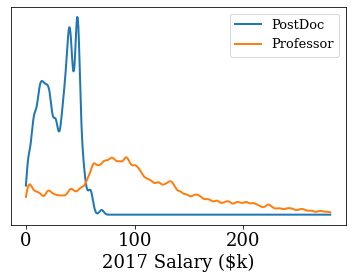

In [33]:
thisdata = df['Sal2017'][(df['JobTitle'].str.contains('POSTDOC')) & (df['Sal2017'] > 0)] / 1e3
kde = kde_scipy(thisdata, np.linspace(0,280,500), bandwidth=2)
plt.plot(np.linspace(0,280,500), kde, lw=2, label='PostDoc')
 
thisdata = df['Sal2017'][(df['JobTitle'].str.contains('PROFESSOR')) & (df['Sal2017'] > 0)] / 1e3
kde = kde_scipy(thisdata, np.linspace(0,280,500), bandwidth=2)
plt.plot(np.linspace(0,280,500), kde, lw=2, label='Professor')

plt.legend(fontsize=13)
plt.xlabel('2017 Salary ($k)')
plt.gca().axes.get_yaxis().set_visible(False)


plt.savefig('postdoc_prof.png',dpi=350, bbox_inches='tight', pad_inches=0.25)

## Part 2: Comparing Universities

In [112]:
df.columns

Index(['Agy', 'AgyTitle', 'Name', 'JobTitle', 'Sal2013', 'Sal2014', 'Sal2015',
       'Sal2016', 'Sal2017'],
      dtype='object')

In [163]:
# thisdata = df['Sal2017'][(df['JobTitle'].str.contains('RESEARCH SCIENTIST/ENGINEER 4')) & (df['Sal2017'] > 0)] / 1e3

uni = df['AgyTitle'][df['AgyTitle'].str.contains('University')].unique()
clrs = ['#4b2e83', '#981e32', '#AB0032', '#33659F', '#a10022']
print(uni)

['University of Washington                                         '
 'Washington State University                                      '
 'Central Washington University                                    '
 'Western Washington University                                    '
 'Eastern Washington University                                    ']


In [197]:
colleges = df['AgyTitle'][df['AgyTitle'].str.contains('College')].unique()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  


University of Washington                                          4829 122.1
Washington State University                                       1677 78.7
Central Washington University                                     456 74.25
Western Washington University                                     597 80.4
Eastern Washington University                                     362 83.55


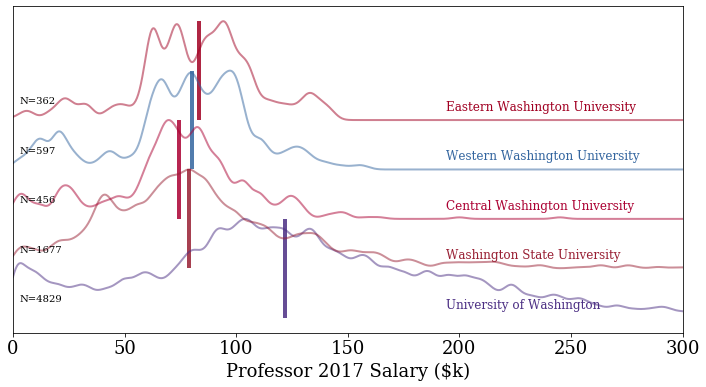

In [179]:
plt.figure(figsize=(12,6))

yoff = 0.5
for k in range(np.size(uni)):
    thisuni = [(df['AgyTitle'].values == uni[k]) & 
               (df['JobTitle'].str.contains('PROFESSOR')) & 
               (df['Sal2017'] > 0)]
    thisdata = df['Sal2017'].values[thisuni] / 1e3

#     _ = plt.hist(thisdata, label=uni[k].strip(), normed=False,
#                  lw=3, bins=np.linspace(0,300,35), histtype='step')
    
    print(uni[k], np.size(thisdata), np.median(thisdata))
    kde = kde_scipy(thisdata, np.linspace(0,300,1000), bandwidth=3)

    plt.plot(np.linspace(0,300,1000), kde/kde.max() +k*yoff, 
             lw=2, c=clrs[k], label=uni[k].strip(), alpha=0.5)
    
    plt.vlines(np.median(thisdata), ymin=0 +k*yoff, ymax=1+k*yoff,
               color=clrs[k], lw=4, alpha=0.85)

    plt.text(194, k*yoff+yoff/5, uni[k].strip(), color=clrs[k], fontsize=12)
    plt.text(3, yoff*k+yoff/3, 'N='+str(np.size(thisdata)), fontsize=10)
    

plt.xlim(0,300)
plt.gca().axes.get_yaxis().set_visible(False)
plt.xlabel('Professor 2017 Salary ($k)')
plt.savefig('univ_salary.png', dpi=350, bbox_inches='tight', pad_inches=0.25)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  del sys.path[0]


University of Washington                                          4829 0.1602782882646364
Washington State University                                       1677 0.2919139465875371
Central Washington University                                     456 0.2879022877084141
Western Washington University                                     597 0.20094976255936017
Eastern Washington University                                     362 0.3553806890684815


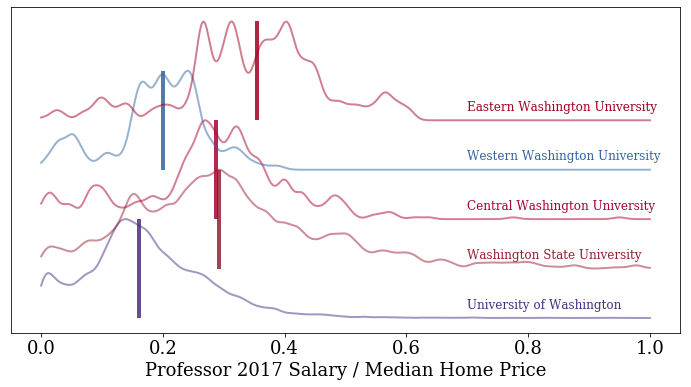

In [193]:
# According to Google, this is the median family home price in each Univ's city
# Note of course, many faculty now don't (can't) live within Seattle city limits...

homes = [761800, 269600, 257900, 400100, 235100]

plt.figure(figsize=(12,6))

yoff = 0.5
for k in range(np.size(uni)):
    thisuni = [(df['AgyTitle'].values == uni[k]) & 
               (df['JobTitle'].str.contains('PROFESSOR')) & 
               (df['Sal2017'] > 0)]
    thisdata = df['Sal2017'].values[thisuni] / homes[k]

    print(uni[k], np.size(thisdata), np.median(thisdata))
    xx = np.linspace(0,1,1000)
    kde = kde_scipy(thisdata, xx, bandwidth=xx.max()/100)

    plt.plot(xx, kde/kde.max() +k*yoff, 
             lw=2, c=clrs[k], label=uni[k].strip(), alpha=0.5)
    
    plt.vlines(np.median(thisdata), ymin=0 +k*yoff, ymax=1+k*yoff,
               color=clrs[k], lw=4, alpha=0.85)
    plt.text(.7, k*yoff+yoff/5, uni[k].strip(), color=clrs[k], fontsize=12)


plt.gca().axes.get_yaxis().set_visible(False)
plt.xlabel('Professor 2017 Salary / Median Home Price')
plt.savefig('univ_cost.png', dpi=350, bbox_inches='tight', pad_inches=0.25)

In [194]:
df.shape

(432043, 9)

In [196]:
df['Name'].unique().shape

(244781,)

In [227]:
def find_nearest(array, value):
    ''' from:
    https://stackoverflow.com/a/2566508
    '''
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  import sys


0 Highline Community College                                        531 23.5
1 Tacoma Community College                                          443 23.9
2 The Evergreen State College                                       376 30.1
3 Seattle Community College                                         847 19.7
4 Skagit Valley College                                             374 19.45
5 Pierce Community College                                          506 23.05
6 Everett Community College                                         712 10.600000000000001
7 Whatcom Community College                                         312 25.65


/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1076: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


8 Spokane Community College                                         0 nan
  >>> nope
9 Olympic College                                                   104 7.6
10 Edmonds Community College                                         543 23.0
11 Renton Technical College                                          246 26.95
12 Wenatchee Valley College                                          283 10.7
13 Shoreline Community College                                       169 63.5
14 Lake Washington Technical College                                 346 18.799999999999997
15 Cascadia Community College                                        133 30.0
16 Peninsula Community College                                       151 8.7
17 Bates Technical College                                           297 11.1
18 Centralia College                                                 173 5.9
19 South Puget Sound Community College                               273 24.4
20 Big Bend Community College                 

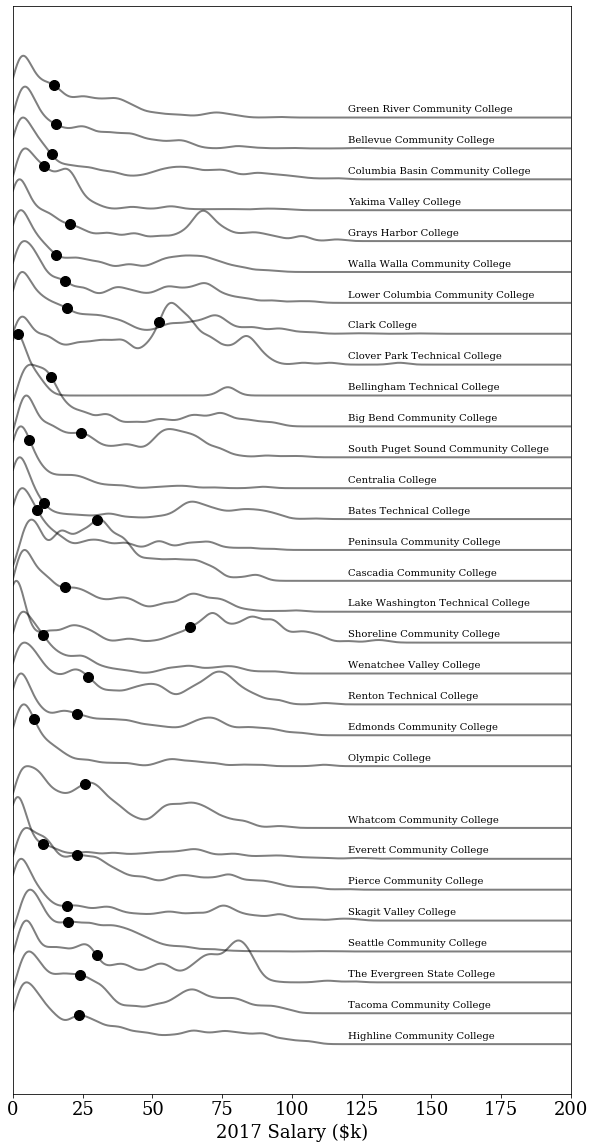

In [228]:
yoff = 0.5
plt.figure(figsize=(10,20))
for k in range(np.size(colleges)):
    thisuni = [(df['AgyTitle'].values == colleges[k]) & 
               (df['JobTitle'].str.contains('PROFESSOR') | df['JobTitle'].str.contains('FACULTY')) &
               (df['Sal2017'] > 0)]
    thisdata = df['Sal2017'].values[thisuni] / 1e3
    print(k, colleges[k], np.size(thisdata), np.nanmedian(thisdata))

    try:
        kde = kde_scipy(thisdata, np.linspace(0,300,1000), bandwidth=3)

        plt.plot(np.linspace(0,300,1000), kde/kde.max() +k*yoff, 
                 lw=2, alpha=0.5, c='k')

        plt.scatter(np.median(thisdata), 
                    kde[find_nearest(np.linspace(0,300,1000),np.median(thisdata))]/kde.max()+k*yoff, 
                    color='k', s=100)

        plt.text(120, k*yoff+yoff/5, colleges[k].strip(), fontsize=10)
    except:
        print('  >>> nope')
plt.xlim(0,200)
plt.gca().axes.get_yaxis().set_visible(False)
plt.xlabel('2017 Salary ($k)')
plt.savefig('college_salary.png', dpi=350, bbox_inches='tight', pad_inches=0.25)

In [223]:
# (df['JobTitle'].values[df['AgyTitle'].values == colleges[8]])[0:100]